# Decision Trees

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll supply the money, and you'll supply models that predict how much various houses are worth.

You ask your cousin how he's predicted real estate values in the past. and he says it is just intuition. But more questioning reveals that he's identified price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Below is one of the patterns he has used

![](assets/SS1.png)

Essentially what he has used is something called a Decision Tree. You can have more branches to the trees and make a very complex looking one too.

After some more questioning you found that this is what essentially your cousin does

![](assets/SS2.png)

In general a decision tree asks a question and then classifies the data based on that question.

It is a supervised learning algorithm that is the base for some of the more accurate machine learning algorithms like Bagging and Boosting that currently exist.

Decision Trees when taken as a single element usually are not very accurate because they tend to overfit on the training data. But when we try averaging or combining them using some other logic, they become incredibly powerful.

Since you have a basic idea behind the working of a decision tree, let's try to get a working model on the Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False #Just some config for the tab autocomplete in jupyter

In [2]:
data = pd.read_csv('Data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


One important thing to notice is that Decision Trees make split in the dataset. This means that rather than imputing the missing values with the mean value or median value, we are better off using some value which indicates that the value is in fact missing. For integer type entries we can do this by using -1 or -999 and for object type columns a simple "Missing" is good enough to indicate the lack of a value.

So let's go ahead and implement that.

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'].replace(np.nan, -1, inplace = True)
data['Embarked'].replace(np.nan, 'Missing', inplace = True)
data['Cabin'].replace(np.nan, 'Missing', inplace = True)

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let us drop columns like PassengerId, Name and Tickets which are unique to every individual and won't help us in identifying a trend

In [6]:
data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])

le_Cabin = LabelEncoder()
data['Cabin'] = le_Cabin.fit_transform(data['Cabin'])

le_Embarked = LabelEncoder()
data['Embarked'] = le_Embarked.fit_transform(data['Embarked'])

#Let's now look at a sample of the data to see what has happened
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,3
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,3
3,1,1,0,35.0,1,0,53.1000,55,3
4,0,3,1,35.0,0,0,8.0500,146,3


Yup, that's it! The data is ready for training

In [8]:
train = data.drop(['Survived'], axis = 1)
target = data['Survived']

from sklearn.model_selection import train_test_split
X_Train, X_CV, Y_Train, Y_CV = train_test_split(train, target, test_size = 0.2)

print(X_Train.shape, X_CV.shape)

(712, 8) (179, 8)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()

tree.fit(X_Train, Y_Train)

valid_pred = tree.predict(X_CV)
print(accuracy_score(Y_CV, valid_pred))

0.8268156424581006


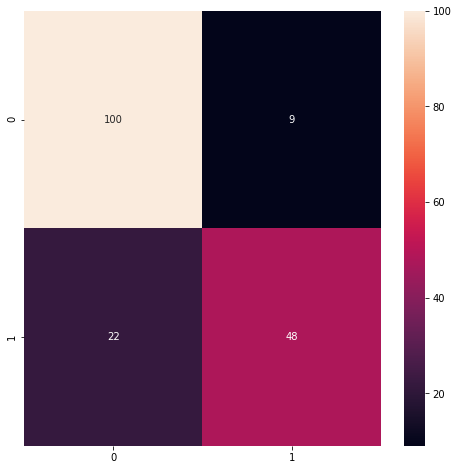

In [11]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(Y_CV, valid_pred), annot = True, fmt = '.3g')
plt.show()

That's all from this workshop!

Thank you all for sticking through the workshop, it was a pleasure conducting this workshop for you all and we hope you learned something from it!